## Filtering data
* some basic analysis and plotting of the data after being filtered

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
acc_exp01_user01 = pd.read_csv('dataset/HAPT-Dataset/Raw-Data/acc_exp01_user01.txt', 
                      delim_whitespace=True, 
                      header=None, names=['acc_X', 'acc_Y', 'acc_Z'])

gyro_exp01_user01 = pd.read_csv('dataset/HAPT-Dataset/Raw-Data/gyro_exp01_user01.txt', 
                      delim_whitespace=True, 
                      header=None, names=['gyro_X', 'gyro_Y', 'gyro_Z'])

## Butterworth Filter
* Use two butterworth filter: low pass and high pass
* Low pass filter will give us the gravity component
* high pass filter will remove any noise from the body component

### Cutoff frequencies
* from here: https://www.mdpi.com/2076-3417/13/3/1500
* 0.25 HZ and 25 Hz

In [3]:
import utilities.filter_acc_data as filter_acc_data
import importlib
importlib.reload(filter_acc_data)
fs = 50.0
cutoff_low = 0.25
cutoff_high = 20
order = 3

gravity_expo01_user01, body_expo01_user01, noise_expo01_user01 = filter_acc_data.get_gravitational_and_body_components(acc_exp01_user01, fs, cutoff_low, cutoff_high, order)


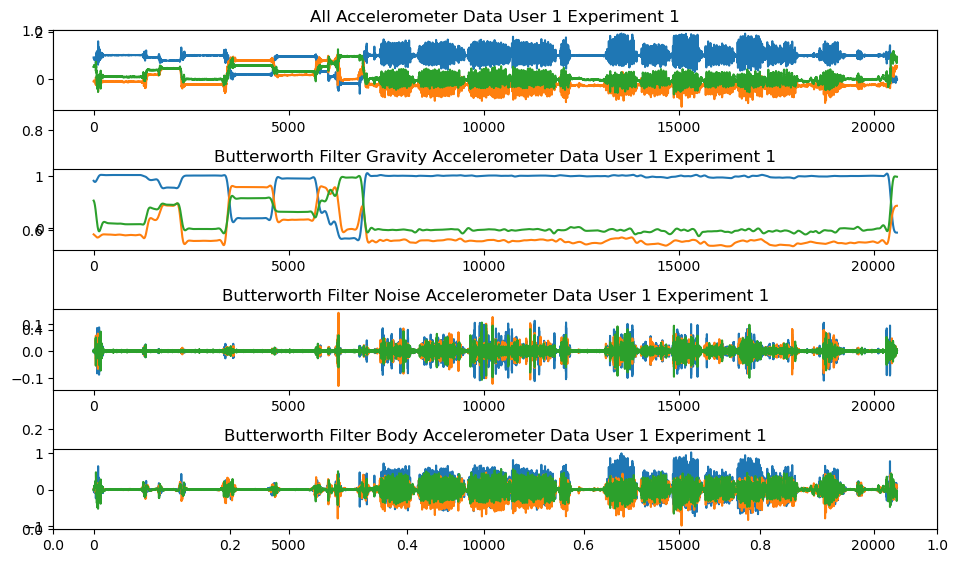

In [4]:
plt.figure(figsize=(10,6))
plt.title('All Accelerometer Data User 1 Experiment 1')
plt.subplot(4, 1, 1)
plt.plot(acc_exp01_user01['acc_X'])
plt.plot(acc_exp01_user01['acc_Y'])
plt.plot(acc_exp01_user01['acc_Z'])
plt.tight_layout()
plt.subplot(4, 1, 2)
plt.title('Butterworth Filter Gravity Accelerometer Data User 1 Experiment 1')
plt.plot(gravity_expo01_user01['acc_X'])
plt.plot(gravity_expo01_user01['acc_Y'])
plt.plot(gravity_expo01_user01['acc_Z'])
plt.tight_layout()
plt.subplot(4, 1, 3)
plt.title('Butterworth Filter Noise Accelerometer Data User 1 Experiment 1')
plt.plot(noise_expo01_user01['acc_X'])
plt.plot(noise_expo01_user01['acc_Y'])
plt.plot(noise_expo01_user01['acc_Z'])
plt.tight_layout()
plt.subplot(4, 1, 4)
plt.title('Butterworth Filter Body Accelerometer Data User 1 Experiment 1')
plt.plot(body_expo01_user01['acc_X'])
plt.plot(body_expo01_user01['acc_Y'])
plt.plot(body_expo01_user01['acc_Z'])
plt.tight_layout()
plt.show()

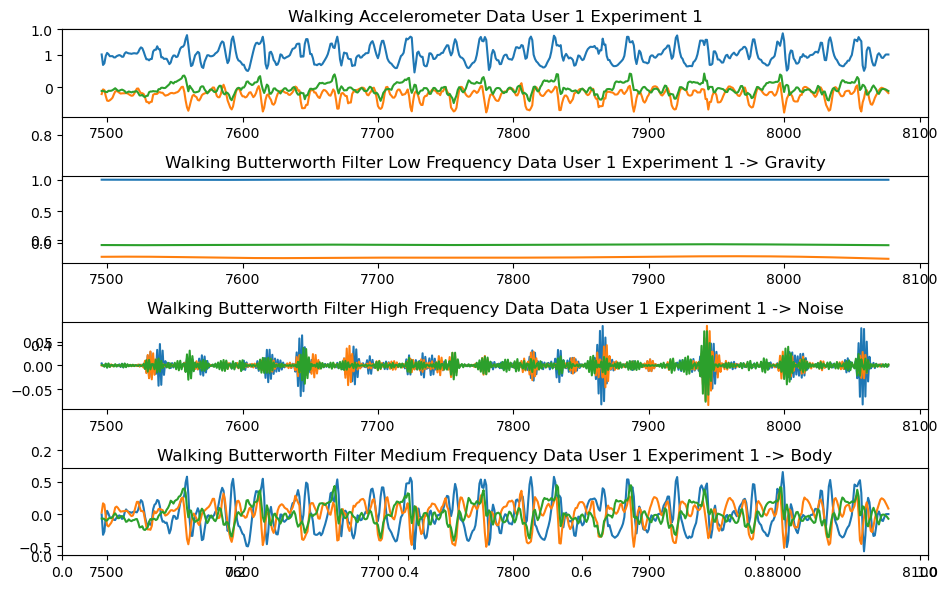

In [5]:
startindex = 7496
endindex = 8078
plt.figure(figsize=(10,6))
plt.title('Walking Accelerometer Data User 1 Experiment 1')
plt.subplot(4, 1, 1)
plt.plot(acc_exp01_user01.iloc[startindex:endindex]['acc_X'])
plt.plot(acc_exp01_user01.iloc[startindex:endindex]['acc_Y'])
plt.plot(acc_exp01_user01.iloc[startindex:endindex]['acc_Z'])
plt.tight_layout()
plt.subplot(4, 1, 2)
plt.title('Walking Butterworth Filter Low Frequency Data User 1 Experiment 1 -> Gravity')
plt.plot(gravity_expo01_user01.iloc[startindex:endindex]['acc_X'])
plt.plot(gravity_expo01_user01.iloc[startindex:endindex]['acc_Y'])
plt.plot(gravity_expo01_user01.iloc[startindex:endindex]['acc_Z'])
plt.tight_layout()
plt.subplot(4, 1, 3)
plt.title('Walking Butterworth Filter High Frequency Data Data User 1 Experiment 1 -> Noise')
plt.plot(noise_expo01_user01.iloc[startindex:endindex]['acc_X'])
plt.plot(noise_expo01_user01.iloc[startindex:endindex]['acc_Y'])
plt.plot(noise_expo01_user01.iloc[startindex:endindex]['acc_Z'])
plt.tight_layout()
plt.subplot(4, 1, 4)
plt.title('Walking Butterworth Filter Medium Frequency Data User 1 Experiment 1 -> Body')
plt.plot(body_expo01_user01.iloc[startindex:endindex]['acc_X'])
plt.plot(body_expo01_user01.iloc[startindex:endindex]['acc_Y'])
plt.plot(body_expo01_user01.iloc[startindex:endindex]['acc_Z'])
plt.show()